<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(0_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_0.8'

In [6]:
os.listdir(base_path)

['data_multi_delta_0.8_n20.csv',
 'data_multi_delta_0.8_n30.csv',
 'data_multi_delta_0.8_n60.csv',
 'data_multi_delta_0.8_n120.csv',
 'data_multi_delta_0.8_n250.csv']

In [7]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.837048,84.555665,-2.325904,188.066809,190.629307,-2.562497
1,0.0,1.0,54.687300,89.661273,-9.263972,145.084601,150.861718,-5.777117
2,0.0,2.0,69.593435,81.697977,-1.766258,159.525155,159.595739,-0.070584
3,0.0,3.0,79.988111,94.506114,0.341017,184.835242,182.719002,2.116239
4,0.0,4.0,77.602661,99.327322,-0.314851,186.615133,184.611468,2.003665
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.551467,98.351700,-4.165777,178.737390,184.650911,-5.913521
29996,999.0,26.0,28.246189,35.923829,1.955321,76.125340,73.495199,2.630141
29997,999.0,27.0,94.601863,39.680371,4.064141,148.346375,142.566424,5.779952
29998,999.0,28.0,58.602132,33.033637,2.920931,104.556700,100.242060,4.314640


In [8]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.837048,84.555665,-2.325904,188.066809,190.629307,-2.562497
1,0.0,1.0,54.687300,89.661273,-9.263972,145.084601,150.861718,-5.777117
2,0.0,2.0,69.593435,81.697977,-1.766258,159.525155,159.595739,-0.070584
3,0.0,3.0,79.988111,94.506114,0.341017,184.835242,182.719002,2.116239
4,0.0,4.0,77.602661,99.327322,-0.314851,186.615133,184.611468,2.003665
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.551467,98.351700,-4.165777,178.737390,184.650911,-5.913521
29996,999.0,26.0,28.246189,35.923829,1.955321,76.125340,73.495199,2.630141
29997,999.0,27.0,94.601863,39.680371,4.064141,148.346375,142.566424,5.779952
29998,999.0,28.0,58.602132,33.033637,2.920931,104.556700,100.242060,4.314640


In [9]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.837048  84.555665 -2.325904  188.066809  190.629307 -2.562497
      1.0    54.687300  89.661273 -9.263972  145.084601  150.861718 -5.777117
      2.0    69.593435  81.697977 -1.766258  159.525155  159.595739 -0.070584
      3.0    79.988111  94.506114  0.341017  184.835242  182.719002  2.116239
      4.0    77.602661  99.327322 -0.314851  186.615133  184.611468  2.003665
...                ...        ...       ...         ...         ...       ...
999.0 25.0   74.551467  98.351700 -4.165777  178.737390  184.650911 -5.913521
      26.0   28.246189  35.923829  1.955321   76.125340   73.495199  2.630141
      27.0   94.601863  39.680371  4.064141  148.346375  142.566424  5.779952
      28.0   58.602132  33.033637  2.920931  104.556700  100.242060  4.314640
      29.0   31.882789  82.147135  3.735045  127.764969  125.721021  2.043948

[30000 rows x 6 columns]

In [10]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.837048  84.555665 -2.325904  188.066809  190.629307 -2.562497
      1.0    54.687300  89.661273 -9.263972  145.084601  150.861718 -5.777117
      2.0    69.593435  81.697977 -1.766258  159.525155  159.595739 -0.070584
      3.0    79.988111  94.506114  0.341017  184.835242  182.719002  2.116239
      4.0    77.602661  99.327322 -0.314851  186.615133  184.611468  2.003665
...                ...        ...       ...         ...         ...       ...
999.0 25.0   74.551467  98.351700 -4.165777  178.737390  184.650911 -5.913521
      26.0   28.246189  35.923829  1.955321   76.125340   73.495199  2.630141
      27.0   94.601863  39.680371  4.064141  148.346375  142.566424  5.779952
      28.0   58.602132  33.033637  2.920931  104.556700  100.242060  4.314640
      29.0   31.882789  82.147135  3.735045  127.764969  125.721021  2.043948

[30000 rows x 6 columns]

In [11]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,95.837048,84.555665,-2.325904,188.066809,190.629307,-2.562497
1,0.0,1.0,54.687300,89.661273,-9.263972,145.084601,150.861718,-5.777117
2,0.0,2.0,69.593435,81.697977,-1.766258,159.525155,159.595739,-0.070584
3,0.0,3.0,79.988111,94.506114,0.341017,184.835242,182.719002,2.116239
4,0.0,4.0,77.602661,99.327322,-0.314851,186.615133,184.611468,2.003665
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,74.551467,98.351700,-4.165777,178.737390,184.650911,-5.913521
29996,999.0,26.0,28.246189,35.923829,1.955321,76.125340,73.495199,2.630141
29997,999.0,27.0,94.601863,39.680371,4.064141,148.346375,142.566424,5.779952
29998,999.0,28.0,58.602132,33.033637,2.920931,104.556700,100.242060,4.314640


In [12]:
table.set_index(['rep', 'index'], inplace=True)

In [13]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    95.837048  84.555665 -2.325904  188.066809  190.629307 -2.562497
      1.0    54.687300  89.661273 -9.263972  145.084601  150.861718 -5.777117
      2.0    69.593435  81.697977 -1.766258  159.525155  159.595739 -0.070584
      3.0    79.988111  94.506114  0.341017  184.835242  182.719002  2.116239
      4.0    77.602661  99.327322 -0.314851  186.615133  184.611468  2.003665
...                ...        ...       ...         ...         ...       ...
999.0 25.0   74.551467  98.351700 -4.165777  178.737390  184.650911 -5.913521
      26.0   28.246189  35.923829  1.955321   76.125340   73.495199  2.630141
      27.0   94.601863  39.680371  4.064141  148.346375  142.566424  5.779952
      28.0   58.602132  33.033637  2.920931  104.556700  100.242060  4.314640
      29.0   31.882789  82.147135  3.735045  127.764969  125.721021  2.043948

[30000 rows x 6 columns]

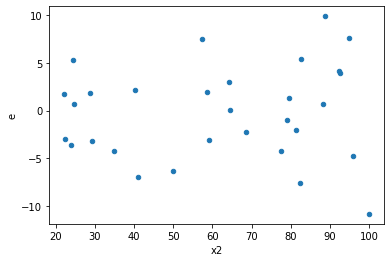

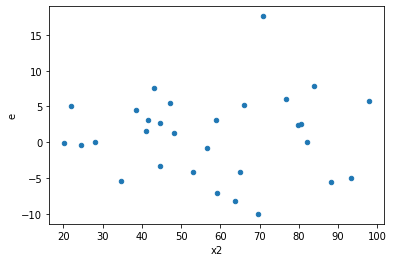

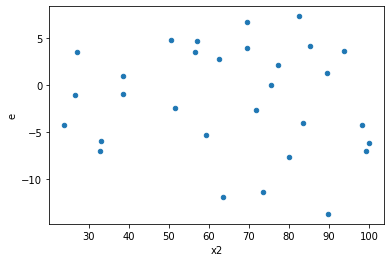

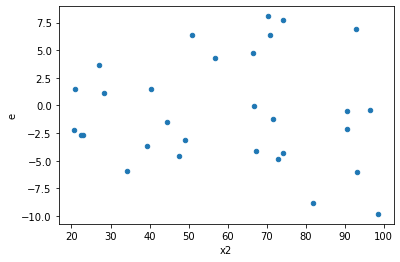

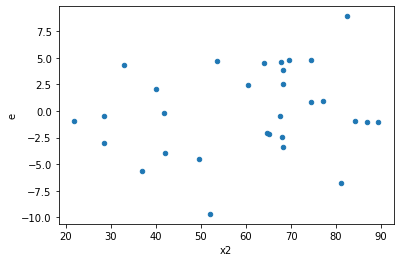

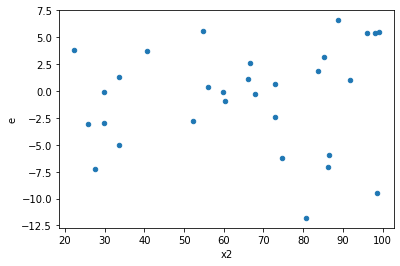

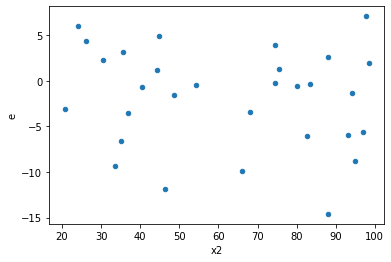

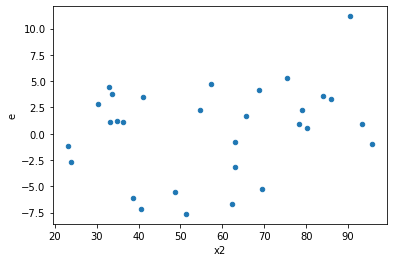

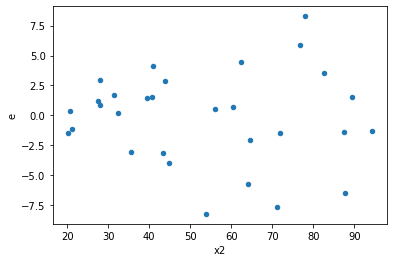

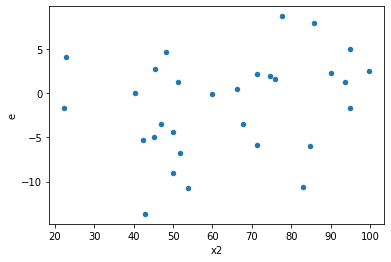

In [14]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [15]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,10.0,10.0,142.34647612547425,305.9564938322014,14.234647612547425,30.595649383220138,2.1493787704481684,0.24343018557722806,0.878284907211386,0.12171509278861403,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,103.63497514741636,253.14905294048964,10.363497514741635,25.314905294048963,2.4426990268526225,0.17510940063395908,0.9124452996830205,0.08755470031697954,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,86.8778002013097,445.34841259237857,8.687780020130969,44.53484125923786,5.126147434217204,0.01634335659349606,0.991828321703252,0.00817167829674803,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,106.69547661275087,318.0683494263395,10.669547661275086,31.80683494263395,2.981085604788686,0.09971607280050798,0.950141963599746,0.04985803640025399,Reject005=1 : Homoscedasticity
10.0,10.0,10.0,222.39278085524168,381.20819323635794,22.23927808552417,38.12081932363579,1.7141212577601213,0.40865980085685183,0.7956700995715741,0.20432990042842591,Reject005=1 : Homoscedasticity
11.0,10.0,10.0,146.40721017844584,535.057241529065,14.640721017844584,53.505724152906495,3.6545825910958887,0.05283566514350868,0.9735821674282457,0.02641783257175434,Reject005=1 : Homoscedasticity
12.0,10.0,10.0,168.26010447021568,330.0747460841071,16.826010447021567,33.00747460841071,1.9616934574204716,0.3031100110000322,0.8484449944999839,0.1515550055000161,Reject005=1 : Homoscedasticity
13.0,10.0,10.0,80.5931366543257,327.34732043909827,8.05931366543257,32.73473204390983,4.06172701582683,0.03718549410898753,0.9814072529455062,0.018592747054493763,Reject005=0 : Heteroscedasticity
15.0,10.0,10.0,73.71307674472102,382.7545363202569,7.371307674472102,38.27545363202569,5.1924916612257395,0.01558951105516182,0.9922052444724191,0.00779475552758091,Reject005=0 : Heteroscedasticity


In [17]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,142.34647612547425,305.9564938322014,14.234647612547425,30.595649383220138,2.1493787704481684,0.24343018557722806,Reject005=1 : Homoscedasticity
1.0,10.0,10.0,202.50080635456862,186.5257967278671,20.25008063545686,18.652579672786707,0.9211113777061702,0.899170792483301,Reject005=1 : Homoscedasticity
2.0,10.0,10.0,234.6542626844705,71.53062732201361,23.46542626844705,7.153062732201361,0.3048341270416117,0.07452183922294876,Reject005=1 : Homoscedasticity
3.0,10.0,10.0,103.63497514741636,253.14905294048964,10.363497514741635,25.314905294048963,2.4426990268526225,0.17510940063395908,Reject005=1 : Homoscedasticity
4.0,10.0,10.0,303.8343299796179,146.5643325780984,30.38343299796179,14.65643325780984,0.482382397630743,0.2659270352160438,Reject005=1 : Homoscedasticity
5.0,10.0,10.0,86.8778002013097,445.34841259237857,8.687780020130969,44.53484125923786,5.126147434217204,0.01634335659349606,Reject005=0 : Heteroscedasticity
6.0,10.0,10.0,106.69547661275087,318.0683494263395,10.669547661275086,31.80683494263395,2.981085604788686,0.09971607280050798,Reject005=1 : Homoscedasticity
7.0,10.0,10.0,316.6469655757925,142.1610882025392,31.664696557579248,14.216108820253918,0.44895768365893773,0.2226583513649528,Reject005=1 : Homoscedasticity
8.0,10.0,10.0,275.84034523628657,253.7909059100405,27.584034523628656,25.37909059100405,0.9200644876391872,0.8977834274255841,Reject005=1 : Homoscedasticity


In [18]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      810
Reject005=0 : Heteroscedasticity    190
Name: Result_test, dtype: int64